In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values


In [19]:
data[0]

array([15, 39], dtype=int64)

In [18]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### define a function to compute a distance between two points aaa and bbb

In [10]:
def compute_distance(a, b):

    dist = np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2) #distance between a and b#

    return dist


In [22]:
compute_distance(data[2],data[1])

75.0066663703967

### define a function to compute a centroid from a given set of points ZZZ

In [28]:
def compute_centroid(Z):
    x,y=0,0
    length=len(Z)
    for point in Z:
        x+=point[0]
        y+=point[1]
    center = [x/length,y/length]#centroid of a set of points in P#
    
    return center


In [31]:
test_arr=[[0,0],[1,2],[2,4]]
compute_centroid(test_arr)

[1.0, 2.0]

### define a function to determine the label of point zzz with a set of centroids MMM

In [77]:
def compute_label(z, M):
    label=0
    dist=1000000
    for i in range(len(M)):
        temp=compute_distance(z,M[i])
        if temp <dist:
            label=i
            dist=temp
        
    return label


In [38]:
compute_label([2,5],test_arr)

2

### define a function to compute the loss with a set of clusters CCC and a set of centroids MMM

In [47]:
def compute_loss(C, M):
    loss=0
    for points, centroid in zip(C,M):
        temp=0
        for point in points:
            temp+=compute_distance(point,centroid)**2
        loss+=temp/len(points)
    
    return loss


In [48]:
compute_loss([[[0,2],[0,3],[0,4]],[[0,1]]],[[0,1],[0,3]])

8.666666666666668

## plot the data points

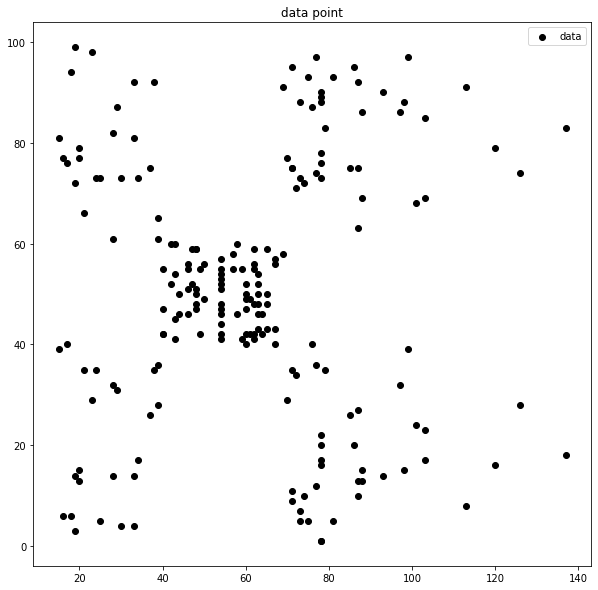

In [73]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

### random initialization

In [131]:
labels = np.random.randint(5,size=[len(data),1])
labels

array([[4],
       [2],
       [3],
       [2],
       [4],
       [0],
       [1],
       [4],
       [3],
       [0],
       [3],
       [1],
       [2],
       [4],
       [3],
       [1],
       [4],
       [0],
       [0],
       [1],
       [2],
       [0],
       [4],
       [4],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [3],
       [1],
       [4],
       [3],
       [4],
       [3],
       [0],
       [1],
       [3],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [3],
       [3],
       [1],
       [3],
       [2],
       [2],
       [2],
       [3],
       [1],
       [4],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
       [3],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [4],
       [1],
    

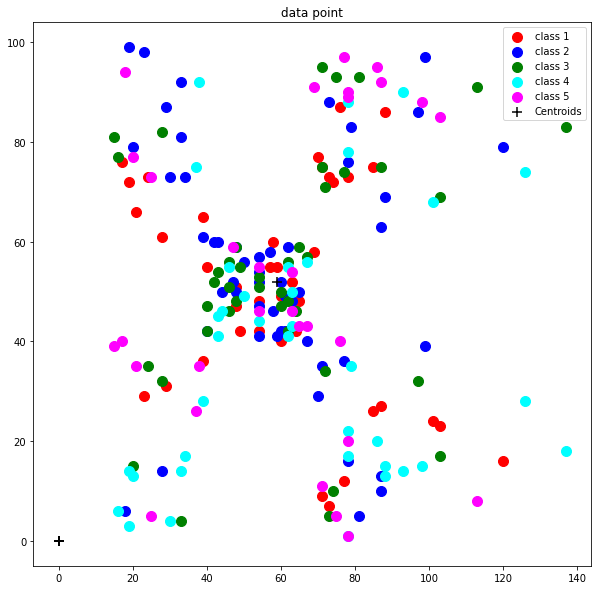

In [212]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

In [211]:
centroids=np.array([[0,0],[0,0],[0,0],[0,0],[0,0]])
for l in np.unique(labels):
    i=0
    idx = np.where(labels==l)
    print(compute_centroid(data[idx[0]]))
    centroids[i]=compute_centroid(data[idx[0]])
    i+=1
   

[60.475, 50.375]
[58.470588235294116, 54.78431372549019]
[60.19047619047619, 53.857142857142854]
[64.51351351351352, 37.486486486486484]
[59.86666666666667, 52.733333333333334]


In [208]:
centroids

array([[ 3,  4],
       [ 0,  0],
       [59, 52],
       [ 0,  0],
       [ 0,  0]])

In [199]:
centroids=np.empty(5)

In [201]:
centroids[1]=[2,3]

ValueError: setting an array element with a sequence.

In [171]:
np.shape(labels==0)
np.shape(data)
data[3,:]

array([16, 77], dtype=int64)

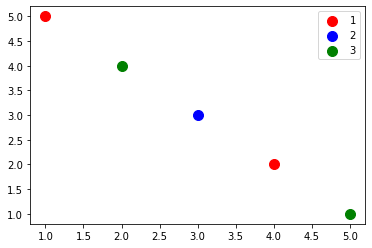

In [128]:
scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()


# outputs

## 1. Plot the data points [1pt]

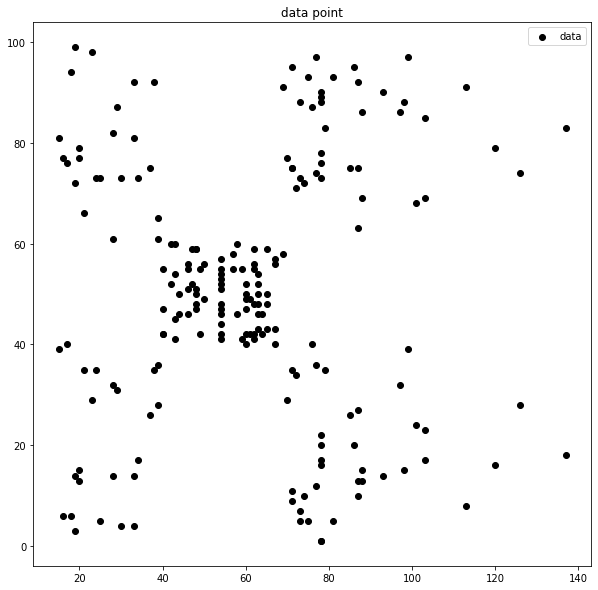

In [76]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

## 3. Plot the loss curve [5pt]

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]